In [1]:
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import numpy as np
import librosa 
import librosa.display


实现抽象类Plotter。包含抽象方法plot(data, *args, **kwargs)方法，以期通过不同子类的具体实现来支持多类型数据的绘制。


In [2]:
class Plotter:
    def __init__(self, data, *args, **kwargs):
        self.data = data
        self.args = args
        self.kwargs = kwargs
    @abstractmethod
    def plot(self):
        pass

覆盖plot, 实现数据点型数据的散点图绘制，即输入数据为[(x,y)...]型，每个元素为一个Point类的实例。


In [3]:
class PointPlotter(Plotter):
    def __init__(self, data, *args, **kwargs):
        super().__init__(data, *args, **kwargs)
        # if not isinstance(self.args[0], )
    def plot(self):
        x = self.data[3]
        y = self.data[4]
        plt.scatter(x,y,
                    s=self.kwargs.get('size',20),
                    c=self.kwargs.get('color','red'))
        plt.title(self.kwargs.get('title','Cosine Wave'))
        plt.show()

覆盖plot, 实现音频型数据的绘制，即输入数据为一段音频（例如mp3、wav文件等），实现音频的读取和基本特征的可视化（包括但不限于波


In [4]:
class AudioPlotter(Plotter):
    def __init__(self, data, *args, **kwargs):
        super().__init__(data, *args, **kwargs)
    def plot(self):
        y = self.data[0]
        sr = self.data[1]
        S_dB = self.data[2]
        
        plt.subplot(2,1,1)
        librosa.display.waveshow(y = y, sr = sr)
        plt.title('Audio Waveform')
        
        plt.subplot(2,1,2)
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel-frequency Spectrogram')
        
        plt.tight_layout()
        
        plt.show()

数据输入

In [5]:
def input_data():
    # 绘制余弦函数的图像需要x,y 左边数据
    # 生成 50个随机数 0～2pi
    x =np.linspace(0,2*np.pi, 50)
    y = np.cos(x)
    # 读取音频文件
    music = 'Merry_Christmas_MrLawrence.mp3'
    y_audio, sr = librosa.load(music)
    
    # 计算梅尔频谱
    S = librosa.feature.melspectrogram(y = y_audio, sr =sr)
    S_dB = librosa.power_to_db(S, ref = np.max)
    
    # 其他参数
    color = 'viridis'
    size = 20 # 点大小
    input_lst = [y_audio, sr, S_dB, x, y]
    
    return (input_lst, size, color)

功能实现

drawing cosine wave...


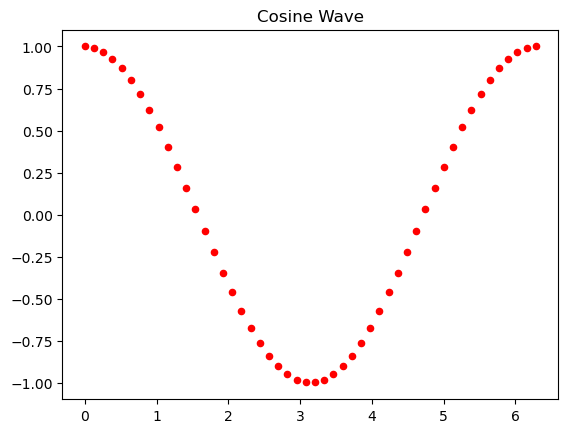

drawing audio wave...


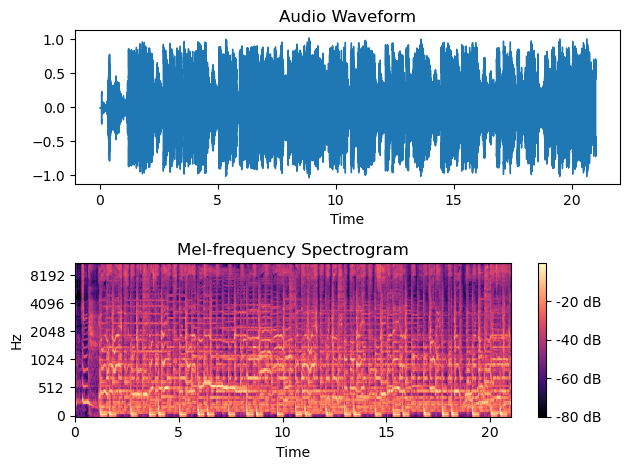

In [6]:
if __name__ == '__main__':
    input_lst, size, color = input_data()
    print('drawing cosine wave...')
    PointPlotter(input_lst, size, color).plot()
    print('drawing audio wave...')
    AudioPlotter(input_lst,color).plot()